# 분류
## 결정트리
* 루트 노드에서 리프 노드까지 만들어 내는 것이 목표
* yes or no에 따른 트리 구조
* 트리 구조가 너무 깊으면 overfitting 된다 - 하이퍼 파라미터로 조정해야 된다.

### 정보이득
- 데이터 집합의 혼잡도 (값은 값이 많으면 낮고, 복잡하면 높다)
- 정보 이득 지수 = 1 - 엔트로피 지수

### 지니 계수
- 데이터의 균일도가 높을 수록 계수가 낮아진다. (0~1로 측정 1로 갈수록 불평등)
- 계수가 낮은 속성을 기준으로 분할



In [18]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

* max_depth = 트리 깊이를 말한다.
* min_samples_split = samples가 n개 이상이어야만 분할한다 (분리하는 조건)
* min_samples_leaf = value 값 각각 하나하나 모두가 n개 미만이면 분할을 멈춘다 (멈추는 조건)

In [113]:
# DecisionTreeClassifier 생성
dt_clf=DecisionTreeClassifier(random_state=11, max_features =1)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features=1, random_state=11)

In [103]:
X_train.shape

(120, 4)

In [104]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

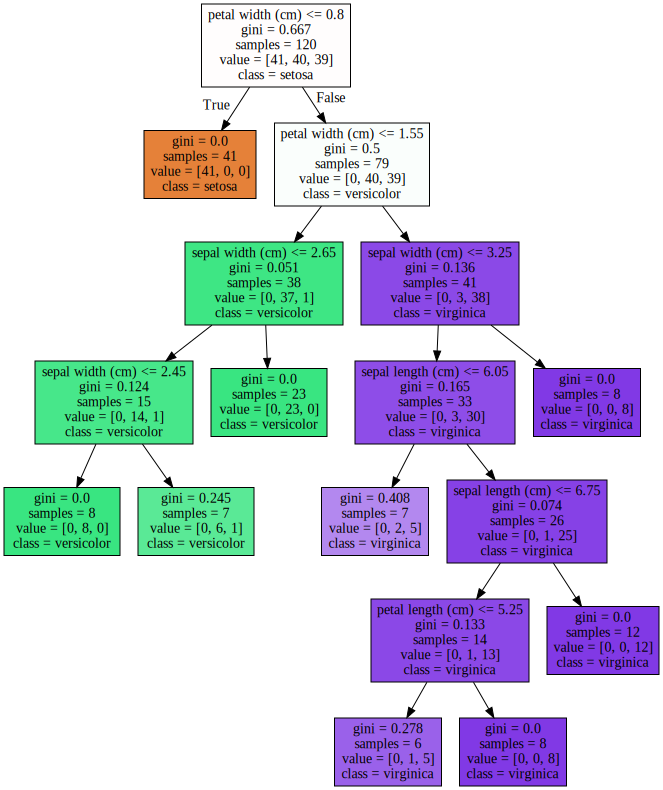

In [105]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 jupyter notebook상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 결정 트리 (Decision Tree) : 과적합

In [106]:
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances:
[0.041 0.01  0.002 0.947]
sepal length (cm) : 0.041
sepal width (cm) : 0.010
petal length (cm) : 0.002
petal width (cm) : 0.947


<AxesSubplot:>

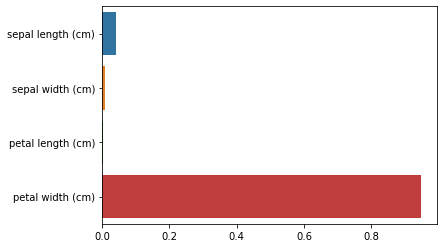

In [114]:
#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    
#feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)



In [115]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

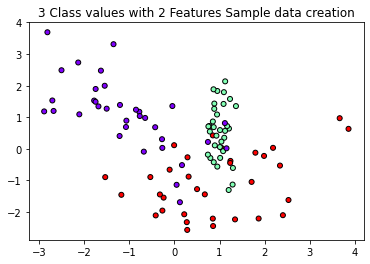

In [118]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state=0)

# plot 형태로 2개의 feature로 2차원 자표 시각화, 각 클래스값은 다른 색까로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap="rainbow", edgecolor = 'k')
plt.show()

In [119]:
import numpy as np

In [121]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k')
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습.
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, lebels=np.arange(n_classes + 1) - 0.5,
                           cmap = 'rainbow', clim=(y.min(), y.max()), zorder=1)

In [122]:
from sklearn.tree import DecisionTreeClassifier

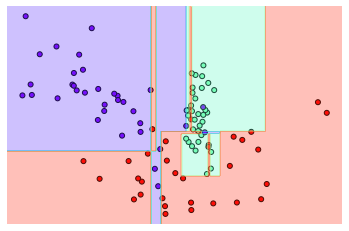

In [124]:
# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

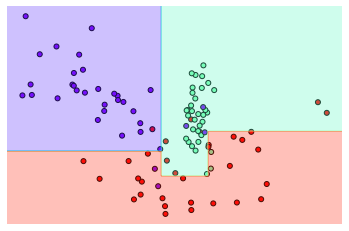

In [131]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)